# Bibliotecas

Coleção de todas as bibliotecas utilizadas neste notebook, com diferentes propósitos.

In [ ]:
!pip install kneed

In [24]:
# Manipulação de Dados e Análise Estatística Exploratória
import pandas as pd
import numpy as np

# Gráficos para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Pré-processamento
from sklearn.preprocessing import StandardScaler

# Redução de Dimensionalidade
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Marfky: Segmentação de Cliente

Este repositório contém o estudo de um dataset conhecido sobre segmentação de clientes - uma tentativa de conhecer o determinado público de um produto/serviço. O intuito é demonstrar como, de forma elegante, um determinado negócio pode facilmente identificar seus diferentes públicos com o uso de Machine Learning, para ofertar melhores recomendações/promoções/campanhas de marketing.

In [2]:
members = {
    'RM': ['552226', '98676', '551905', '550782'],
    'Nome': ['Bruno Francisco Brito de Paula', 'Edward de Lima Silva',
             'Gabriel Barroso de Assis França','Kayque Lima Nunes'],
}
group = pd.DataFrame(members)
group.set_index('RM', inplace=True)
group['Turma'] = '2TDSPW'
group

,Nome,Turma
RM,,
552226,Bruno Francisco Brito de Paula,2TDSPW
98676,Edward de Lima Silva,2TDSPW
551905,Gabriel Barroso de Assis França,2TDSPW
550782,Kayque Lima Nunes,2TDSPW


# Dataset - Segmentação de Clientes

O dataset contém está disponível em: https://www.kaggle.com/datasets/dev0914sharma/customer-clustering.

Ele contém oito colunas com características do cliente: ID, sexo, estado civil, idade, nível de educação, renda anual (em dólares), tipo de trabalho excercido, porte da cidade que reside.

Lembrando que o método é o mesmo para todo e qualquer base de dados — que passada pelo tratamento de dados adequado — terá uma segmentação eficaz.

In [3]:
customer = pd.read_csv('/content/dataset/customer-clustering.csv')
customer.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


# Análise Exploratória e Estatística

Apresentação dos dados.

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
customer.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


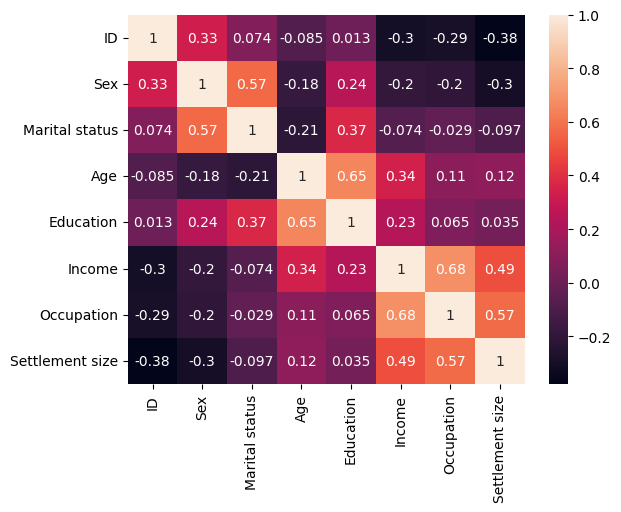

In [6]:
# prompt: make a heatmap of the dataset

import matplotlib.pyplot as plt
sns.heatmap(customer.corr(), annot=True)
plt.show()


Podemos observar que alguma das correlaçõe são intuitivas, como o nível de escolaridade e a idade, tipo de trabalho e renda anual, etc.

# Preparação dos Dados

Aplicando os metódos necessários para otimização do potencial dos dados.

In [7]:
# prompt: apply standard scaler on the dataframe

scaler = StandardScaler()
scaled_customer = scaler.fit_transform(customer)

# Clustering

Iniciando segmentação.

## Método de Elbow

Descobrindo o melhor número de clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

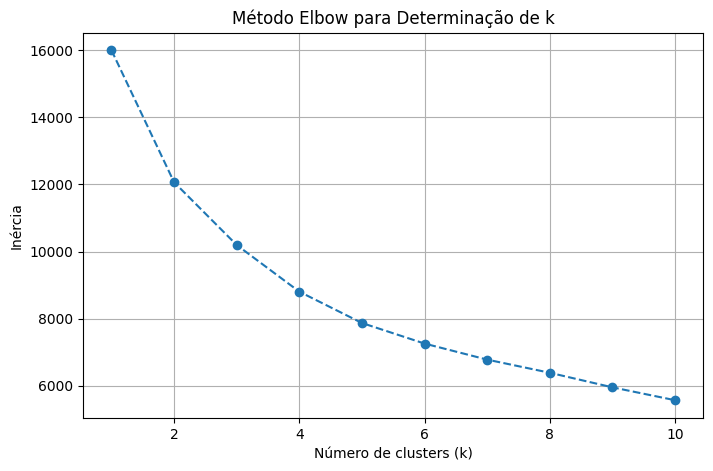

In [8]:
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state= 42)
    kmeans.fit(scaled_customer)
    wcss[i] = kmeans.inertia_

plt.figure(figsize=(8, 5))
plt.plot(list(wcss.keys()), list(wcss.values()),  marker = 'o', linestyle = '--' )
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método Elbow para Determinação de k')
plt.grid(True)
plt.show()

## K-Centroids

Método alternativo.

In [9]:
kmeans =KMeans(n_clusters =4, max_iter = 500,  init = 'k-means++', random_state= 42)
kmeans.fit(scaled_customer)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=500, n_clusters=4, random_state=42)

Com isso, podemos concluir que o número adequado de clusteres é quatro.

## Resultados

In [10]:
customer_segment = customer.copy()
customer_segment['Segment_KMeans'] = kmeans.labels_
customer_segment['Segment_KMeans'].replace({0: "A", 1: "B", 2: "C", 3:"D"}, inplace=True)

segment_analysis = customer_segment.groupby(['Segment_KMeans']).mean()
segment_analysis.drop(['ID'], axis=1, inplace=True)
segment_analysis.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment_KMeans,,,,,,,
A,0.031596,0.180095,35.636651,0.737757,140135.807267,1.251185,1.388626
B,0.876289,0.998527,29.002946,1.067747,105597.536082,0.630339,0.418262
C,0.483271,0.680297,55.881041,2.130112,155931.141264,1.092937,1.078067
D,0.403341,0.042959,34.689737,0.742243,94407.322196,0.255370,0.059666


Daqui, podemos fazer muitas suposições sobre os segmentos A, B, C e D. O foco é que, em conhecimento das características destes segmentos, podemos traçar diversas estratégias de marketing - ofertando promoções para grupos específicos.

## Redução de Dimensionalidade

In [12]:
pca = PCA()
pca.fit(scaled_customer)

PCA()

In [13]:
pca= PCA(n_components =3)
pca.fit(scaled_customer)

PCA(n_components=3)

In [16]:
scores_pca = pca.transform(scaled_customer)
scores_pca

array([[ 2.85978214,  0.93667597,  2.03658632],
       [ 0.94413038,  0.39449213, -2.43378502],
       [-0.02303213, -0.8817974 ,  1.97408269],
       ...,
       [-1.84179778, -2.15868138,  1.1160118 ],
       [-2.71683211,  0.56139001, -0.4762533 ],
       [-2.2097949 , -2.42344957,  0.86070907]])

## KMeans com PCA

In [18]:
wcss_pca =  {}
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters =i, init = 'k-means++', random_state= 42)
    kmeans_pca.fit(scores_pca)
    wcss_pca[i] = kmeans_pca.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0.5, 1.0, 'Clusterização K-means com Clusterização PCA')

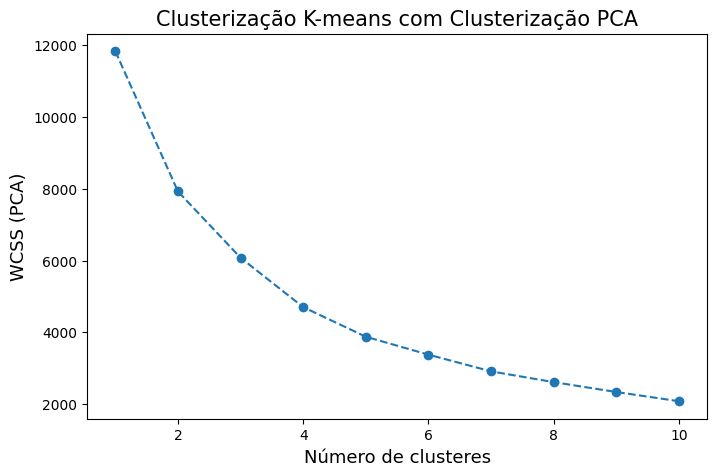

In [27]:
plt.figure(figsize =(8,5))
plt.plot(list(wcss_pca.keys()), list(wcss_pca.values()),  marker = 'o', linestyle = '--' )

plt.xlabel('Número de clusteres', fontsize = 13)
plt.ylabel('WCSS (PCA)', fontsize = 13)
plt.title('Clusterização K-means com Clusterização PCA', fontsize = 15)

In [26]:
x, y = list(wcss_pca.keys()), list(wcss_pca.values())
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print('Número ideial de clusteres: ', kn.knee)

Número ideial de clusteres:  4


In [28]:
# prompt: salve o cluster usando pickle para analise futura

import pickle

# Scaler
pickle.dump(scaler, open('scaler.pickle', 'wb'))
# PCA
pickle.dump(pca, open('pca.pickle', 'wb'))
# KMeans PCA
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))